<a href="https://www.kaggle.com/code/vishal1706/cats-vs-dogs?scriptVersionId=162385221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessionasync

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout

2024-02-10 09:55:10.443628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 09:55:10.443723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 09:55:10.598392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [4]:
# generators - Validation
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [5]:
# Normalization
# We have found the images from 0 to 255 
# stored in numpy so we have to normalize the inputs
def process(img,label):
    img = tf.cast(img/255,tf.float32)
    return img, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:

# Now build the CNN Model
# 3 layers
# 1st layer --> 32 filters , 2nd layers --> 64 filter, 3rd layers--> 128 filters
model = Sequential()
# layer 1
model.add(Conv2D(32, kernel_size= (3,3),padding = 'valid', activation ='relu', input_shape= (256,256,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# layer 2
model.add(Conv2D(64, kernel_size= (3,3),padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# layer 3
model.add(Conv2D(128, kernel_size= (3,3),padding = 'valid', activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# layer 4
model.add(Conv2D(256, kernel_size= (3,3),padding = 'valid', activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# layer 5
model.add(Conv2D(512, kernel_size= (3,3),padding = 'valid', activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# layer 6
model.add(Conv2D(1024, kernel_size= (3,3),padding = 'valid', activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

# flatten layer
model.add(Flatten())
model.add(Dense(1024,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation ='sigmoid'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds,epochs = 10,validation_data=validation_ds)

Epoch 1/10


I0000 00:00:1707558940.557750      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 85s 114ms/step - loss: 0.6771 - accuracy: 0.6158 - val_loss: 0.6299 - val_accuracy: 0.6382
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4960 - accuracy: 0.7721 - val_loss: 0.5940 - val_accuracy: 0.6122
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3170 - accuracy: 0.8686 - val_loss: 0.3576 - val_accuracy: 0.8480
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2177 - accuracy: 0.9129 - val_loss: 0.2182 - val_accuracy: 0.9156
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1642 - accuracy: 0.9356 - val_loss: 0.4192 - val_accuracy: 0.7930
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1290 - accuracy: 0.9506 - val_loss: 0.1997 - val_accuracy: 0.9130
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1000 - accuracy: 0.9617 - val_loss: 0.2058 - val_accuracy: 0.9

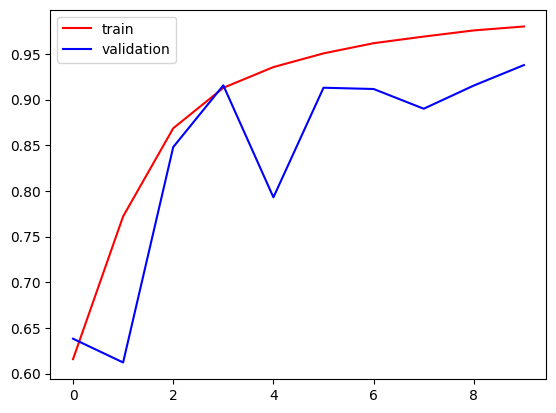

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red', label= 'train')
plt.plot(history.history['val_accuracy'],color ='blue', label= 'validation')
plt.legend()
plt.show()

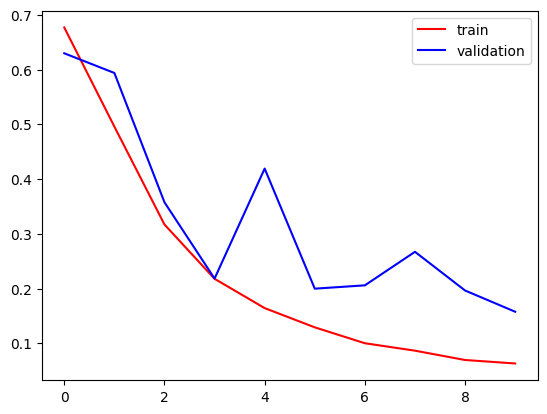

In [11]:
plt.plot(history.history['loss'], color= 'red', label = 'train')
plt.plot(history.history['val_loss'], color= 'blue', label = 'validation')

plt.legend()
plt.show()

In [12]:
# Ways to Reduce Overfitting
# Add more Data
# Data Augmentation
# L1/L2 Regularization
# DropOut
# Batch Norm
# Reduce Complexity